<a href="https://colab.research.google.com/github/CryptoRobotFr/TrueStrategy/blob/main/3SuperTrend/3SuperTrend_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install python-binance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 KB 914.6 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 482.0 kB/s eta 0:00:001.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.7/292.7 KB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 KB 794.9 kB/s eta 0:00:001m794.4 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.8/338.8 KB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas_ta

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas_ta-0.3.14b0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


<h1>Import Dataset</h1>

In [9]:
import pandas as pd
from binance.client import Client
import ta
import pandas_ta as pda
import matplotlib.pyplot as plt

client = Client()

klinesT = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_1HOUR, "01 january 2017")

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

                        open     high      low    close             volume
timestamp                                                                 
2018-04-17 04:00:00  0.25551  0.28800  0.25551  0.26664   8143693.23000000
2018-04-17 05:00:00  0.26660  0.27798  0.26010  0.26200   8317923.61000000
2018-04-17 06:00:00  0.26221  0.26396  0.24800  0.25664   8420095.41000000
2018-04-17 07:00:00  0.25662  0.26300  0.25489  0.25698   4686043.91000000
2018-04-17 08:00:00  0.25636  0.25998  0.25229  0.25631   3510038.13000000
...                      ...      ...      ...      ...                ...
2022-11-11 11:00:00  0.36060  0.36340  0.35910  0.36000   4864977.70000000
2022-11-11 12:00:00  0.36000  0.36440  0.35900  0.36390   5338956.80000000
2022-11-11 13:00:00  0.36380  0.36750  0.36220  0.36340   8254200.00000000
2022-11-11 14:00:00  0.36340  0.36350  0.34220  0.35050  33011349.10000000
2022-11-11 15:00:00  0.35050  0.35310  0.35000  0.35030   1006635.80000000

[39981 rows x 5 columns]

<h1>Backtest Execution</h1>

In [11]:
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)
df['EMA90']=ta.trend.ema_indicator(df['close'], 90)
# df['RSI'] =ta.momentum.rsi(df['close'],14)
# df['Hrsi'] =df['rsi'].rolling(14).max()
# df['Lrsi'] =df['rsi'].rolling(14).min()
# df['stoch_rsi'] = (df['rsi'] - df['Lrsi']) / (df['Hrsi'] - df['Lrsi'])
# df['histo_macd']=ta.trend.macd_diff(df['close'], 26, 12, 9)
# df['EMA28']=ta.trend.ema_indicator(df['close'], 28)
# df['EMA48']=ta.trend.ema_indicator(df['close'], 48)
# df['MACD']=ta.trend.macd(df['close'], 26, 12, 9)
# df['MACD_SIGNAL']=ta.trend.macd_signal(df['close'], 26, 12, 9)
# df['MACD_HISTO']= df['MACD'] - df['MACD_SIGNAL']
# df['EMA8']=ta.trend.ema_indicator(df['close'], 8)
# df['EMA14']=ta.trend.ema_indicator(df['close'], 14)
# df['EMA50']=ta.trend.ema_indicator(df['close'], 50)
# df['HIGH_BOL_BAND']=ta.volatility.bollinger_hband(df['close'], 23, 0)
# df['LOW_BOL_BAND']=ta.volatility.bollinger_lband(df['close'], 20, 2)
# df['HIGH_BOL_BAND']=df['HIGH_BOL_BAND'].shift(periods=37)
# df['LOW_BOL_BAND']=df['LOW_BOL_BAND'].shift(periods=10)
df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])
# df['MEAN_STOCH_RSI'] = ta.trend.sma_indicator(df['STOCH_RSI'], 3)
# df['SIGNAL_MEAN_STOCH_RSI'] = ta.trend.sma_indicator(df['MEAN_STOCH_RSI'], 3)
# df["TRIX0"] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(df['close'], 9, fillna=False), 9, fillna=False), 9, fillna=False)
# df['TRIX1'] =  df["TRIX0"].pct_change()*100
# df['TRIX2'] = ta.trend.sma_indicator(df['TRIX1'],22)
# df['histo'] = df['TRIX1'] - df['TRIX2']
# df['MAX_RECTANGLE9'] = df['high'].rolling(9).max()
# df['MAX_RECTANGLE26'] = df['high'].rolling(26).max()
# df['MAX_RECTANGLE52'] = df['high'].rolling(52).max()
# df['MAX_RECTANGLE9']=df['MAX_RECTANGLE9'].shift(periods=1)
# df['MAX_RECTANGLE26']=df['MAX_RECTANGLE26'].shift(periods=1)
# df['MAX_RECTANGLE52']=df['MAX_RECTANGLE52'].shift(periods=1)
# df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
# df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])
# df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
# df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,46).shift(periods=48)
# df['TENKAN26'] = df['TENKAN'].shift(periods=25)
# df['SHIFT26']=df['close'].shift(periods=-25)
# df['HISTO'] = df['SHIFT26']-df['TENKAN']
# df['HISTO'] = df['HISTO'].shift(periods=25)
# df['SHIFT26']=df['SHIFT26'].shift(periods=26)
# df['ATR'] = ta.volatility.average_true_range(df['high'],df['low'],df['close'],10)
# df['BAIC_SUPER_UP'] = (df['high'] + df['low']) / 2 - 3 * df['ATR']
# df['BAIC_SUPER_DOWN'] = (df['high'] + df['low']) / 2 + 3 * df['ATR']
ST_length = 20
ST_multiplier = 3.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 20
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 40
ST_multiplier = 8.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
# df['close-1'] = df['close'].shift(periods=1)
# df['FINAL_SUPER_UP'] = 0
#df

/tmp/ipykernel_56718/2551366664.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


<h1>Extract Best Parameters (can take some time)</h1>

/tmp/ipykernel_56718/1225963844.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1225963844.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1225963844.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1225963844.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1225963844.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

        i        result
0    10.0  20751.180237
3    40.0  22408.791140
2    30.0  22547.775334
4    50.0  23101.056925
18  190.0  24522.492245
17  180.0  24828.339213
1    20.0  24955.310515
16  170.0  25038.611341
5    60.0  26866.743066
7    80.0  28767.519642
14  150.0  29035.685892
15  160.0  32053.992723
13  140.0  33666.854482
6    70.0  34352.088335
8    90.0  37957.495768
9   100.0  39469.160269
12  130.0  44216.259381
10  110.0  44647.037449
11  120.0  48591.983338


/tmp/ipykernel_56718/1225963844.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)


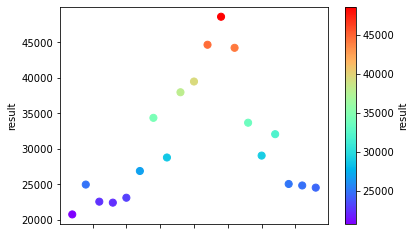

In [12]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(10,200,10):
      # ST_length = 20
      # ST_multiplier = 3.0
      # superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
      # df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
      # df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

      # ST_length = 20
      # ST_multiplier = 4.0
      # superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
      # df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
      # df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

      # ST_length = 40
      # ST_multiplier = 8.0
      # superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
      # df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
      # df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
      df['EMA50']=ta.trend.sma_indicator(df['close'], i)

      dfTest = df.copy()
      usdt = 1000
      coin = 0
      fee = 0.0007
      wallet = 1000

      for index, row in dfTest.iterrows():
          #BUY
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
              buyPrice = row['close']
              coin = usdt/buyPrice
              coin = coin - fee*coin
              usdt = 0
              wallet = coin * row['close']
              #print("buy btc at ",df['close'][index]," || ",df['timestamp'][index], " || I have ",fiat,"$ and ",btc," btc")
          #SELL
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2 and coin > 0:
              sellPrice = row['close']
              usdt = coin*sellPrice
              usdt = usdt - fee*usdt
              coin = 0
              wallet = usdt
              #print("sell btc at ",df['close'][index]," || ",df['timestamp'][index], "|| I have ",fiat,"$ and ",btc," btc")
      myrow = {'i': i,'result': wallet}
      dt = dt.append(myrow,ignore_index=True) 
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y=1,c='result',s=50,colormap='rainbow') 
plt.show()    

/tmp/ipykernel_56718/1584640092.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1584640092.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1584640092.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1584640092.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/tmp/ipykernel_56718/1584640092.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

Period : [2018-04-17 04:00:00] -> [2022-11-11 15:00:00]
Starting balance : 1000 $
Final balance : 23287.92 $
Performance vs US Dollar : 2228.79 %
Buy and Hold Performence : 31.38 %
Performance vs Buy and Hold : 7003.57 %
Number of negative trades :  182
Number of positive trades :  106
Average Positive Trades :  11.0 %
Average Negative Trades :  -3.54 %
Best trade +149.26 %, the  2021-02-14 16:00:00
Worst trade -18.11 %, the  2021-05-21 21:00:00
Worst drawBack -64.0 %
Total fee :  6766.8 $
PLOT


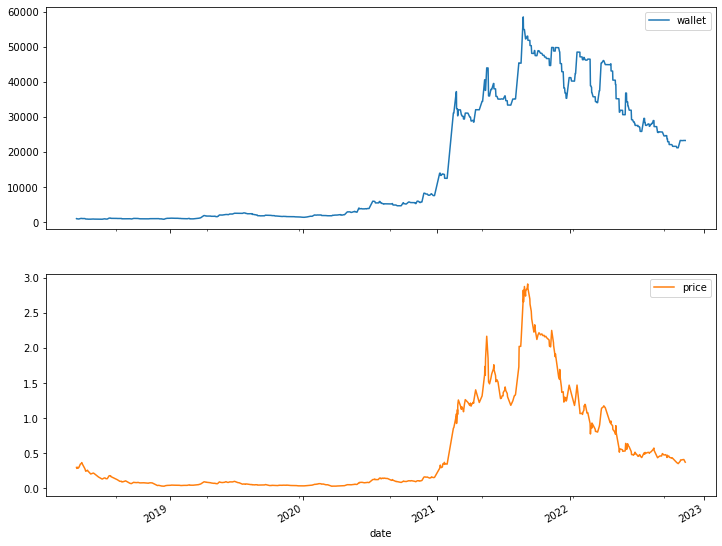

In [13]:
dfTest = df.copy()
# dfTest = df['2021-01-01':]
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastRow = dfTest.iloc[0]
fee = 0.0007
stopLoss = 0
goOn = True

for index, row in dfTest.iterrows():
  #Buy
  # if row['SUPER_TREND_DIRECTION'] == 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA90'] and usdt > 0 and goOn == True:
    buyPrice = row['close']
    # stopLoss = buyPrice - 0.02 * buyPrice
    coin = usdt / buyPrice
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': buyPrice,'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  #Stop Loss
  # elif row['low'] < stopLoss and coin > 0:
  #   sellPrice = stopLoss
  #   usdt = coin * sellPrice
  #   frais = 0.005 * usdt
  #   usdt = usdt - frais
  #   coin = 0
  #   goOn = False
  #   wallet = usdt
  #   if wallet > lastAth:
  #     lastAth = wallet
  #   # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
  #   myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
  #   dt = dt.append(myrow,ignore_index=True)    

  # Sell
  elif row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2:
    goOn = True
    if coin > 0:
      sellPrice = row['close']
      usdt = coin * sellPrice
      frais = fee * usdt
      usdt = usdt - frais
      coin = 0
      wallet = usdt
      if wallet > lastAth:
        lastAth = wallet
      # print("Sell COIN at",sellPrice,'$ the', index)
      myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
      dt = dt.append(myrow,ignore_index=True)
  
  lastRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100



Starting balance : 1000 $
Final balance : 23287.92 $
Performance vs US Dollar : 2228.79 %
Buy and Hold Performence : 31.38 %
Performance vs Buy and Hold : 7003.57 %
Number of negative trades :  182
Number of positive trades :  106
Average Positive Trades :  11.0 %
Average Negative Trades :  -3.54 %
Best trade +149.26 %, the  2021-02-14 16:00:00
Worst trade -18.11 %, the  2021-05-21 21:00:00
Worst drawBack -64.0 %
Total fee :  6766.8 $
PLOT


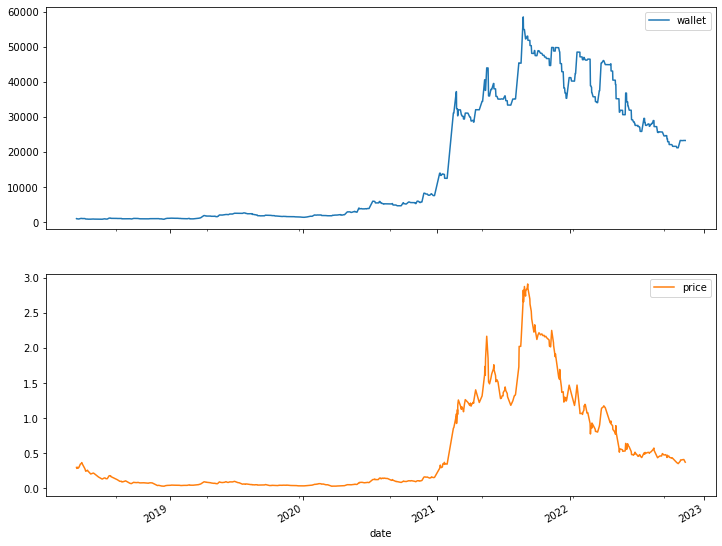

In [14]:
print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')
# dt